## Geometry

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt


from pyscf import gto,scf,ao2mo,mp,cc,fci,tools

In [2]:
def get_geometry(dist = 1.0, type = "triang"):
    if type == "triang":
        alt = np.sqrt(dist**2 - (dist/2)**2)
        return "H .0 .0 .0; H .0 .0 " + str(dist) + "; H .0 " + str(alt) + " " + str(dist/2)
    
    if type == "linear":
        return "H .0 .0 .0; H .0 .0 " + str(dist) + "; H .0 .0 " + str(-dist)
    
    if type == "bended":
        alt = dist * np.sqrt(2)
        return "H .0 .0 .0; H .0 .0 " + str(dist) + "; H .0 " + str(alt) + " " + str(dist+alt)

geom_type = ["triang", "linear", "bended"]

energies = {}
energies["triang"] = []
energies["linear"] = []
energies["bended"] = []

dist = np.arange(0.2, 3.5, .1)

for j in range(len(dist)):
    for i in range(len(geom_type)):
        geometry = get_geometry(dist[j], geom_type[i])
        
        mol = gto.M(atom=geometry,charge=1,spin=0,basis="sto-6g",symmetry=True,verbose=0)
    
        mf  = scf.RHF(mol)
        Ehf = mf.kernel() 
    
        fci_h3 = fci.FCI(mf)  #<- nei metodi correlati passiamo come argomento un conto di campo medio, HF
        e_fci = fci_h3.kernel()[0]
        energies[geom_type[i]].append(e_fci)

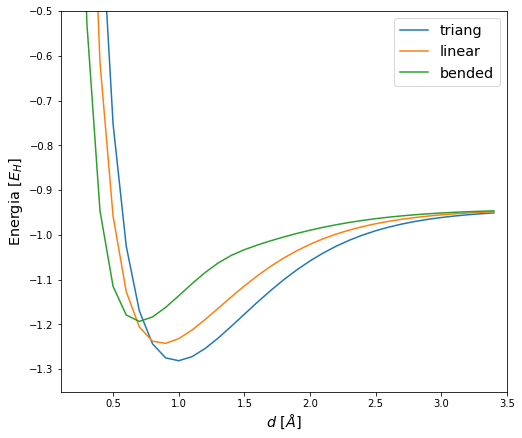

In [3]:
MIN = .7
MAX = 1.2

fig, ax = plt.subplots(figsize=[8, 7])

for (method,E) in energies.items():
    plt.plot(dist,E,label=method)
    
plt.xlabel(r"$d$ $[\AA]$", fontsize = 'x-large')
plt.ylabel(r"Energia $[E_H]$", fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.ylim([-1.35, -0.5])
plt.xlim([0.1, 3.5])


plt.savefig('FCI_geometry.pdf')
plt.show()

In [4]:
energies

{'triang': [3.1518111712329606,
  0.7930249944681096,
  -0.23748138680009934,
  -0.7527805858030661,
  -1.0251057217763142,
  -1.1699429398436902,
  -1.243309226610007,
  -1.2748268385778982,
  -1.2811879994251272,
  -1.2722647705355443,
  -1.2541321018359217,
  -1.2306719129030719,
  -1.2044585772543404,
  -1.1772556560041043,
  -1.1502958922569932,
  -1.1244398972305527,
  -1.1002689580616152,
  -1.0781444800233184,
  -1.0582520399914652,
  -1.040638740917995,
  -1.025247128948065,
  -1.01194614523635,
  -1.0005584080056462,
  -0.9908829093203823,
  -0.9827125641869093,
  -0.9758466366305582,
  -0.9700986094113239,
  -0.9653003957808022,
  -0.9613038824951533,
  -0.9579807036602956,
  -0.9552209634214397,
  -0.9529314255228286,
  -0.9510335121611921],
 'linear': [1.92242925893808,
  0.12223251351189202,
  -0.614412055313164,
  -0.9587076703534279,
  -1.1266575358056552,
  -1.2059922440356858,
  -1.237589293759693,
  -1.2423892036246307,
  -1.2319273882229824,
  -1.2129199088612543,
 